# Proyek Analisis Data: UAS Tugas Besar
- Kelompok : **Dakode**
- Anggota : </br>
10122320 - Rifasa Hardianto S.</br>
10122321 - Ihsanul Akram</br>
10122322 - Fajar Krismahendra Bintang **Pangestu** </br>
10122475 - Ryan Muhammad H. </br>
10122334 - Berry Abdul Ghany </br>
10122337 - Fadlan Bani Nugraha</br>

## Menyaipkan semua Library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/My Drive/Data Science/Datasets'

Mounted at /content/drive


In [3]:
data = pd.read_csv(path+'/order_items_dataset.csv')
data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


### Assessing Data

In [4]:
# mengidentifikasi data di setiap kolom dari database 'order_items_dataset.csv'

data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [5]:
# membuat dataframe baru dari kolom pilihan

data = data[['order_item_id', 'product_id', 'shipping_limit_date', 'price', 'freight_value']]
data

,order_item_id,product_id,shipping_limit_date,price,freight_value
0,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29
1,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93
2,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87
3,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79
4,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...
112645,1,4aa6014eceb682077f9dc4bffebc05b0,2018-05-02 04:11:01,299.99,43.41
112646,1,32e07fd915822b0765e448c4dd74c828,2018-07-20 04:31:48,350.00,36.53
112647,1,72a30483855e2eafc67aee5dc2560482,2017-10-30 17:14:25,99.90,16.95
112648,1,9c422a519119dcad7575db5af1ba540e,2017-08-21 00:04:32,55.99,8.72


In [6]:
product = pd.read_csv(path+'/products_dataset.csv')
product_dict = {idx:title for idx, title in zip(product['product_id'], product['product_category_name'])}

In [7]:
data['product'] = [product_dict[str(x)] if str(x) in list(product_dict.keys()) else "Not Found!" for x in data['product_id']]

<ipython-input-7-aa028ef6934f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product'] = [product_dict[str(x)] if str(x) in list(product_dict.keys()) else "Not Found!" for x in data['product_id']]


In [8]:
data

,order_item_id,product_id,shipping_limit_date,price,freight_value,product
0,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao
3,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79,perfumaria
4,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim
...,...,...,...,...,...,...
112645,1,4aa6014eceb682077f9dc4bffebc05b0,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas
112646,1,32e07fd915822b0765e448c4dd74c828,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios
112647,1,72a30483855e2eafc67aee5dc2560482,2017-10-30 17:14:25,99.90,16.95,esporte_lazer
112648,1,9c422a519119dcad7575db5af1ba540e,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios


### Cleaning Data

In [9]:
# mentotalkan di setiap field yang tidak memiliki nilai atau missing value (NaN value)

data.isnull().sum()

order_item_id             0
product_id                0
shipping_limit_date       0
price                     0
freight_value             0
product                1603
dtype: int64

In [10]:
# melihat semua product dan jumlah product-nya

data['product'].value_counts()

cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product, Length: 73, dtype: int64

In [11]:
# menghapus baris yang memiliki nilai atau missing value (NaN value) menjadi 0, jika ada

# data = data.dropna()
data = data.fillna('uncategories')
# data = data.fillna(0)

In [12]:
data.isnull().sum()

order_item_id          0
product_id             0
shipping_limit_date    0
price                  0
freight_value          0
product                0
dtype: int64

## Exploratory Data Analysis (EDA)


### Product Order

In [13]:
# cek semua tipedata dari setiap kolom

data.dtypes

order_item_id            int64
product_id              object
shipping_limit_date     object
price                  float64
freight_value          float64
product                 object
dtype: object

In [14]:
# merubah tipe data kolom 'shipping_limit_date' dari 'object'/'datetime' menjadi 'date'

data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date']).dt.date
data['shipping_limit_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 112650 entries, 0 to 112649
Series name: shipping_limit_date
Non-Null Count   Dtype 
--------------   ----- 
112650 non-null  object
dtypes: object(1)
memory usage: 880.2+ KB


In [15]:
data

,order_item_id,product_id,shipping_limit_date,price,freight_value,product
0,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19,58.90,13.29,cool_stuff
1,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03,239.90,19.93,pet_shop
2,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18,199.00,17.87,moveis_decoracao
3,1,7634da152a4610f1595efa32f14722fc,2018-08-15,12.99,12.79,perfumaria
4,1,ac6c3623068f30de03045865e4e10089,2017-02-13,199.90,18.14,ferramentas_jardim
...,...,...,...,...,...,...
112645,1,4aa6014eceb682077f9dc4bffebc05b0,2018-05-02,299.99,43.41,utilidades_domesticas
112646,1,32e07fd915822b0765e448c4dd74c828,2018-07-20,350.00,36.53,informatica_acessorios
112647,1,72a30483855e2eafc67aee5dc2560482,2017-10-30,99.90,16.95,esporte_lazer
112648,1,9c422a519119dcad7575db5af1ba540e,2017-08-21,55.99,8.72,informatica_acessorios


In [16]:
# melihat kembali total baris dan kolom dari dataset 'order_items_dataset.csv'

data.shape

(112650, 6)

In [17]:
# melihat lagi informasi tentang dataset 'order_items_dataset.csv'

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_item_id        112650 non-null  int64  
 1   product_id           112650 non-null  object 
 2   shipping_limit_date  112650 non-null  object 
 3   price                112650 non-null  float64
 4   freight_value        112650 non-null  float64
 5   product              112650 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [18]:
# melihat jumlah value unik di setiap field-nya dari dataset 'order_items_dataset.csv'

data.nunique()

order_item_id             21
product_id             32951
shipping_limit_date      555
price                   5968
freight_value           6999
product                   74
dtype: int64

In [19]:
# melihat data duplikat

data[['order_item_id', 'product_id', 'shipping_limit_date', 'price', 'freight_value']].value_counts().reset_index(name='counts')

,order_item_id,product_id,shipping_limit_date,price,freight_value,counts
0,1,53b36df67ebb7c41585e8d54d6772e08,2018-05-14,99.90,0.00,18
1,1,368c6c730842d78016ad823897a372db,2017-11-30,49.00,17.67,17
2,1,53759a2ecddad2bb87a079a1f1519f73,2017-11-30,49.00,17.67,16
3,1,422879e10f46682990de24d770e7f83d,2017-11-30,49.00,17.64,14
4,1,389d119b48cf3043d311335e499d9c6b,2017-11-30,49.00,17.67,12
...,...,...,...,...,...,...
109103,1,617186c3d97ea56c9c683a8a3974e8c1,2017-08-24,84.99,15.34,1
109104,1,617186c3d97ea56c9c683a8a3974e8c1,2017-08-22,84.99,12.09,1
109105,1,617186c3d97ea56c9c683a8a3974e8c1,2017-08-21,84.99,15.34,1
109106,1,617186c3d97ea56c9c683a8a3974e8c1,2017-08-16,84.99,15.34,1


In [20]:
# data[['product_id', 'shipping_limit_date', 'year']].value_counts().reset_index(name='counts')

In [21]:
data['product'] = data['product'].astype(str)
data['product'].value_counts().keys().sort_values()

Index(['agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas', 'artes',
       'artes_e_artesanato', 'artigos_de_festas', 'artigos_de_natal', 'audio',
       'automotivo', 'bebes', 'bebidas', 'beleza_saude', 'brinquedos',
       'cama_mesa_banho', 'casa_conforto', 'casa_conforto_2',
       'casa_construcao', 'cds_dvds_musicais', 'cine_foto', 'climatizacao',
       'consoles_games', 'construcao_ferramentas_construcao',
       'construcao_ferramentas_ferramentas',
       'construcao_ferramentas_iluminacao', 'construcao_ferramentas_jardim',
       'construcao_ferramentas_seguranca', 'cool_stuff', 'dvds_blu_ray',
       'eletrodomesticos', 'eletrodomesticos_2', 'eletronicos',
       'eletroportateis', 'esporte_lazer', 'fashion_bolsas_e_acessorios',
       'fashion_calcados', 'fashion_esporte', 'fashion_roupa_feminina',
       'fashion_roupa_infanto_juvenil', 'fashion_roupa_masculina',
       'fashion_underwear_e_moda_praia', 'ferramentas_jardim', 'flores',
       'fraldas_higiene', 

In [22]:
products = ['All Products'] + list(data['product'].value_counts().keys().sort_values())

In [23]:
products

['All Products',
 'agro_industria_e_comercio',
 'alimentos',
 'alimentos_bebidas',
 'artes',
 'artes_e_artesanato',
 'artigos_de_festas',
 'artigos_de_natal',
 'audio',
 'automotivo',
 'bebes',
 'bebidas',
 'beleza_saude',
 'brinquedos',
 'cama_mesa_banho',
 'casa_conforto',
 'casa_conforto_2',
 'casa_construcao',
 'cds_dvds_musicais',
 'cine_foto',
 'climatizacao',
 'consoles_games',
 'construcao_ferramentas_construcao',
 'construcao_ferramentas_ferramentas',
 'construcao_ferramentas_iluminacao',
 'construcao_ferramentas_jardim',
 'construcao_ferramentas_seguranca',
 'cool_stuff',
 'dvds_blu_ray',
 'eletrodomesticos',
 'eletrodomesticos_2',
 'eletronicos',
 'eletroportateis',
 'esporte_lazer',
 'fashion_bolsas_e_acessorios',
 'fashion_calcados',
 'fashion_esporte',
 'fashion_roupa_feminina',
 'fashion_roupa_infanto_juvenil',
 'fashion_roupa_masculina',
 'fashion_underwear_e_moda_praia',
 'ferramentas_jardim',
 'flores',
 'fraldas_higiene',
 'industria_comercio_e_negocios',
 'informati

In [24]:
data['order_item_id'].value_counts().nlargest(5)

1    98666
2     9803
3     2287
4      965
5      460
Name: order_item_id, dtype: int64

### Total order

menentukan total order per tahunnya, perbulannya, perharinya


#### -> Total Order Per Tahun

In [25]:
data

,order_item_id,product_id,shipping_limit_date,price,freight_value,product
0,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19,58.90,13.29,cool_stuff
1,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03,239.90,19.93,pet_shop
2,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18,199.00,17.87,moveis_decoracao
3,1,7634da152a4610f1595efa32f14722fc,2018-08-15,12.99,12.79,perfumaria
4,1,ac6c3623068f30de03045865e4e10089,2017-02-13,199.90,18.14,ferramentas_jardim
...,...,...,...,...,...,...
112645,1,4aa6014eceb682077f9dc4bffebc05b0,2018-05-02,299.99,43.41,utilidades_domesticas
112646,1,32e07fd915822b0765e448c4dd74c828,2018-07-20,350.00,36.53,informatica_acessorios
112647,1,72a30483855e2eafc67aee5dc2560482,2017-10-30,99.90,16.95,esporte_lazer
112648,1,9c422a519119dcad7575db5af1ba540e,2017-08-21,55.99,8.72,informatica_acessorios


In [26]:
# membuat kolom baru yg namanya 'year', yg mana datanya diambil dari kolom 'shipping_limit_date' dengan memisahkan tahunnya

data['year'] = pd.to_datetime(data['shipping_limit_date']).dt.year
data['year']

0         2017
1         2017
2         2018
3         2018
4         2017
          ... 
112645    2018
112646    2018
112647    2017
112648    2017
112649    2018
Name: year, Length: 112650, dtype: int64

In [27]:
# mengelompokkan dataframe utama berdasarkan dari kolom tahun / 'year'

grouped_year_df = data.groupby('year')
grouped_year_df

In [28]:
# menghitung total order dari kolom 'order_id' dari data yang sudah dikelompokkan sebelumnya

year_total_orders = grouped_year_df['order_item_id'].count()

In [29]:
# menampilkan total order di setiap tahunnya
year_total_orders

year
2016      370
2017    49765
2018    62511
2020        4
Name: order_item_id, dtype: int64

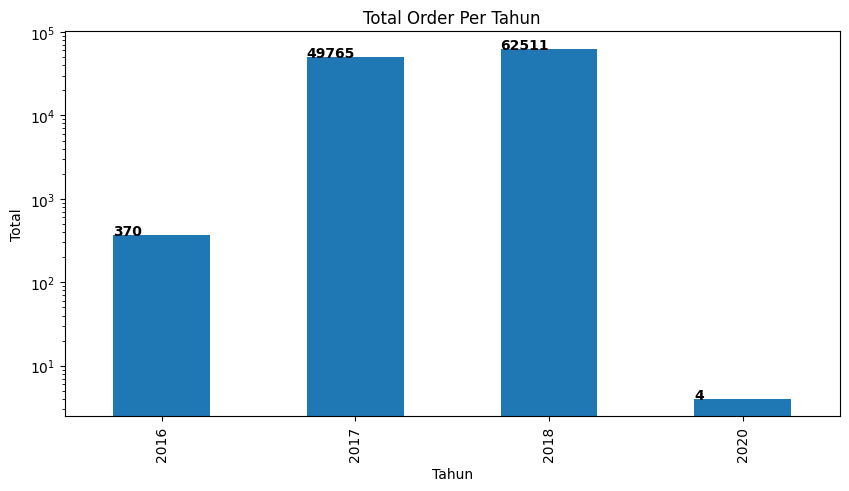

In [30]:
dt_year = year_total_orders.plot(
          kind='bar',
          title='Total Order Per Tahun',
          ylabel='Total',
          xlabel='Tahun',
          figsize=(10, 5),
          logy=True
    )

for p in dt_year.patches:
    dt_year.annotate(str(p.get_height()), (p.get_x(), p.get_height()), weight='bold')

plt.show()

#### -> Total Order per Bulan


**total order perbulan dari Tahun yang terbanyak, yaitu Tahun 2018**

In [31]:
# menambahkan kolom 'month' untuk data utama

data['month'] = pd.to_datetime(data['shipping_limit_date']).dt.month
data['month']

0          9
1          5
2          1
3          8
4          2
          ..
112645     5
112646     7
112647    10
112648     8
112649     6
Name: month, Length: 112650, dtype: int64

In [32]:
data

,order_item_id,product_id,shipping_limit_date,price,freight_value,product,year,month
0,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19,58.90,13.29,cool_stuff,2017,9
1,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03,239.90,19.93,pet_shop,2017,5
2,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18,199.00,17.87,moveis_decoracao,2018,1
3,1,7634da152a4610f1595efa32f14722fc,2018-08-15,12.99,12.79,perfumaria,2018,8
4,1,ac6c3623068f30de03045865e4e10089,2017-02-13,199.90,18.14,ferramentas_jardim,2017,2
...,...,...,...,...,...,...,...,...
112645,1,4aa6014eceb682077f9dc4bffebc05b0,2018-05-02,299.99,43.41,utilidades_domesticas,2018,5
112646,1,32e07fd915822b0765e448c4dd74c828,2018-07-20,350.00,36.53,informatica_acessorios,2018,7
112647,1,72a30483855e2eafc67aee5dc2560482,2017-10-30,99.90,16.95,esporte_lazer,2017,10
112648,1,9c422a519119dcad7575db5af1ba540e,2017-08-21,55.99,8.72,informatica_acessorios,2017,8


In [33]:
# untuk tahun order yang tertinggi

df_2018 = data[data['year'] == 2018]
df_2018

,order_item_id,product_id,shipping_limit_date,price,freight_value,product,year,month
2,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18,199.00,17.87,moveis_decoracao,2018,1
3,1,7634da152a4610f1595efa32f14722fc,2018-08-15,12.99,12.79,perfumaria,2018,8
7,1,557d850972a7d6f792fd18ae1400d9b6,2018-07-10,810.00,70.75,ferramentas_jardim,2018,7
8,1,310ae3c140ff94b03219ad0adc3c778f,2018-03-26,145.95,11.65,beleza_saude,2018,3
9,1,4535b0e1091c278dfd193e5a1d63b39f,2018-07-06,53.99,11.40,livros_tecnicos,2018,7
...,...,...,...,...,...,...,...,...
112639,1,ebceb9726cf5c6187b48e17fe58747b0,2018-04-09,17.90,22.06,cama_mesa_banho,2018,4
112644,1,6f0169f259bb0ff432bfff7d829b9946,2018-06-28,119.85,20.03,casa_construcao,2018,6
112645,1,4aa6014eceb682077f9dc4bffebc05b0,2018-05-02,299.99,43.41,utilidades_domesticas,2018,5
112646,1,32e07fd915822b0765e448c4dd74c828,2018-07-20,350.00,36.53,informatica_acessorios,2018,7


In [34]:
# membuat kolom bulan di tahun order tertinggi

df_2018['month'] = pd.to_datetime(df_2018['shipping_limit_date']).dt.month
df_2018['month']

<ipython-input-34-2bd378a995ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['month'] = pd.to_datetime(df_2018['shipping_limit_date']).dt.month


2         1
3         8
7         7
8         3
9         7
         ..
112639    4
112644    6
112645    5
112646    7
112649    6
Name: month, Length: 62511, dtype: int64

In [35]:
df_2018

,order_item_id,product_id,shipping_limit_date,price,freight_value,product,year,month
2,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18,199.00,17.87,moveis_decoracao,2018,1
3,1,7634da152a4610f1595efa32f14722fc,2018-08-15,12.99,12.79,perfumaria,2018,8
7,1,557d850972a7d6f792fd18ae1400d9b6,2018-07-10,810.00,70.75,ferramentas_jardim,2018,7
8,1,310ae3c140ff94b03219ad0adc3c778f,2018-03-26,145.95,11.65,beleza_saude,2018,3
9,1,4535b0e1091c278dfd193e5a1d63b39f,2018-07-06,53.99,11.40,livros_tecnicos,2018,7
...,...,...,...,...,...,...,...,...
112639,1,ebceb9726cf5c6187b48e17fe58747b0,2018-04-09,17.90,22.06,cama_mesa_banho,2018,4
112644,1,6f0169f259bb0ff432bfff7d829b9946,2018-06-28,119.85,20.03,casa_construcao,2018,6
112645,1,4aa6014eceb682077f9dc4bffebc05b0,2018-05-02,299.99,43.41,utilidades_domesticas,2018,5
112646,1,32e07fd915822b0765e448c4dd74c828,2018-07-20,350.00,36.53,informatica_acessorios,2018,7


In [56]:
grouped_month_df = df_2018.groupby(['month'])
grouped_month_df

In [57]:
month_total_orders = grouped_month_df['order_item_id'].count()

In [58]:
month_total_orders

month
1    7492
2    7375
3    8759
4    7637
5    8765
6    6897
7    6672
8    8815
9      99
Name: order_item_id, dtype: int64

In [60]:
# month_total_orders.unstack()

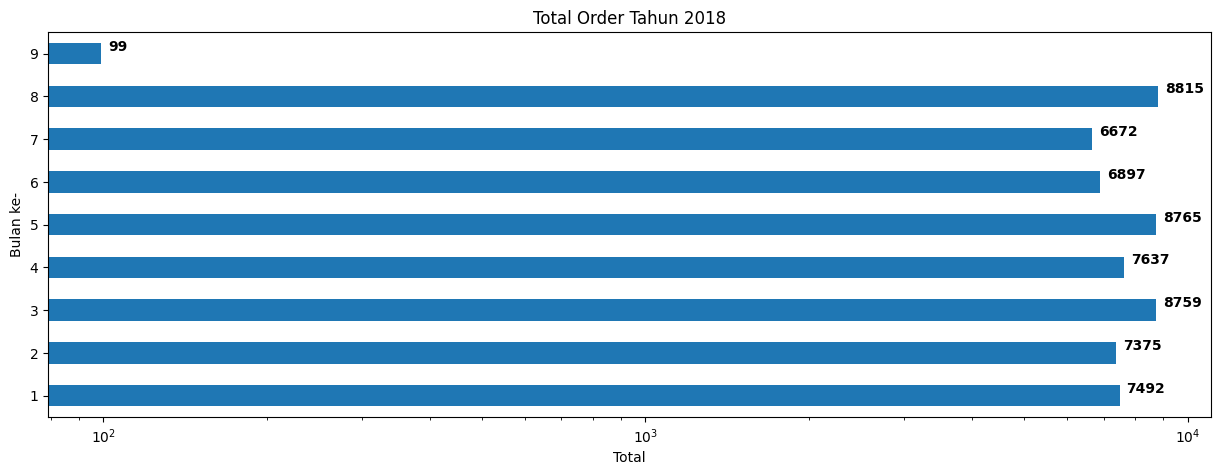

In [61]:
dt_month = month_total_orders.plot(
    kind='barh',
    title='Total Order Tahun 2018',
    ylabel='Bulan ke-',
    xlabel='Total',
    figsize=(15, 5),
    logx=True
    )

for p in dt_month.patches:
    dt_month.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points', weight='bold')

plt.show()

#### -> Total Order per Hari

**total order perhari dari Bulan yang terbanyak, yaitu Bulan ke-5**

In [41]:
# menambahkan kolom 'month' untuk data utama

data['day'] = pd.to_datetime(data['shipping_limit_date']).dt.day
data['day']

0         19
1          3
2         18
3         15
4         13
          ..
112645     2
112646    20
112647    30
112648    21
112649    12
Name: day, Length: 112650, dtype: int64

In [42]:
data

,order_item_id,product_id,shipping_limit_date,price,freight_value,product,year,month,day
0,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19,58.90,13.29,cool_stuff,2017,9,19
1,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03,239.90,19.93,pet_shop,2017,5,3
2,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18,199.00,17.87,moveis_decoracao,2018,1,18
3,1,7634da152a4610f1595efa32f14722fc,2018-08-15,12.99,12.79,perfumaria,2018,8,15
4,1,ac6c3623068f30de03045865e4e10089,2017-02-13,199.90,18.14,ferramentas_jardim,2017,2,13
...,...,...,...,...,...,...,...,...,...
112645,1,4aa6014eceb682077f9dc4bffebc05b0,2018-05-02,299.99,43.41,utilidades_domesticas,2018,5,2
112646,1,32e07fd915822b0765e448c4dd74c828,2018-07-20,350.00,36.53,informatica_acessorios,2018,7,20
112647,1,72a30483855e2eafc67aee5dc2560482,2017-10-30,99.90,16.95,esporte_lazer,2017,10,30
112648,1,9c422a519119dcad7575db5af1ba540e,2017-08-21,55.99,8.72,informatica_acessorios,2017,8,21


In [43]:
# untuk bulan order yang tertinggi

df_mei = df_2018[df_2018['month'] == 5]
df_mei

,order_item_id,product_id,shipping_limit_date,price,freight_value,product,year,month
16,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,2018-05-02,639.00,11.34,consoles_games,2018,5
17,1,4fa33915031a8cde03dd0d3e8fb27f01,2018-05-16,144.00,8.77,perfumaria,2018,5
53,1,bdcf6a834e8faa30dac3886c7a58e92e,2018-05-22,35.90,15.20,beleza_saude,2018,5
59,1,18901878788fec7ddc55e64d1ace8187,2018-05-14,149.90,43.11,bebes,2018,5
71,1,01c666c82f414c762ad21bffa56e8b49,2018-05-08,94.90,18.54,brinquedos,2018,5
...,...,...,...,...,...,...,...,...
112575,2,fdcf45aa23bb8312ecc0027d6e1ef1c4,2018-05-03,7.84,22.06,artigos_de_natal,2018,5
112576,3,fdcf45aa23bb8312ecc0027d6e1ef1c4,2018-05-03,7.84,22.06,artigos_de_natal,2018,5
112578,1,acf90725a7a1fa2b5f4f0d77da84403b,2018-05-23,95.00,17.38,eletronicos,2018,5
112609,1,3dd2a17168ec895c781a9191c1e95ad7,2018-05-27,149.90,13.34,informatica_acessorios,2018,5


In [44]:
# membuat kolom hari di bulan order tertinggi

df_mei['day'] = pd.to_datetime(df_mei['shipping_limit_date']).dt.day
df_mei['day']

<ipython-input-44-60e54036532a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mei['day'] = pd.to_datetime(df_mei['shipping_limit_date']).dt.day


16         2
17        16
53        22
59        14
71         8
          ..
112575     3
112576     3
112578    23
112609    27
112645     2
Name: day, Length: 8765, dtype: int64

In [45]:
df_mei

,order_item_id,product_id,shipping_limit_date,price,freight_value,product,year,month,day
16,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,2018-05-02,639.00,11.34,consoles_games,2018,5,2
17,1,4fa33915031a8cde03dd0d3e8fb27f01,2018-05-16,144.00,8.77,perfumaria,2018,5,16
53,1,bdcf6a834e8faa30dac3886c7a58e92e,2018-05-22,35.90,15.20,beleza_saude,2018,5,22
59,1,18901878788fec7ddc55e64d1ace8187,2018-05-14,149.90,43.11,bebes,2018,5,14
71,1,01c666c82f414c762ad21bffa56e8b49,2018-05-08,94.90,18.54,brinquedos,2018,5,8
...,...,...,...,...,...,...,...,...,...
112575,2,fdcf45aa23bb8312ecc0027d6e1ef1c4,2018-05-03,7.84,22.06,artigos_de_natal,2018,5,3
112576,3,fdcf45aa23bb8312ecc0027d6e1ef1c4,2018-05-03,7.84,22.06,artigos_de_natal,2018,5,3
112578,1,acf90725a7a1fa2b5f4f0d77da84403b,2018-05-23,95.00,17.38,eletronicos,2018,5,23
112609,1,3dd2a17168ec895c781a9191c1e95ad7,2018-05-27,149.90,13.34,informatica_acessorios,2018,5,27


In [46]:
grouped_day_df = df_mei.groupby(['month', 'day'])
grouped_day_df

In [47]:
day_total_orders = grouped_day_df['order_item_id'].count()

In [48]:
day_total_orders

month  day
5      1       63
       2      367
       3      368
       4      541
       6       24
       7      576
       8      261
       9      480
       10     673
       11     421
       13      70
       14     483
       15     448
       16     474
       17     605
       18     400
       20      43
       21     358
       22     494
       23     322
       24     394
       25     214
       27      21
       28     254
       29     196
       30     125
       31      90
Name: order_item_id, dtype: int64

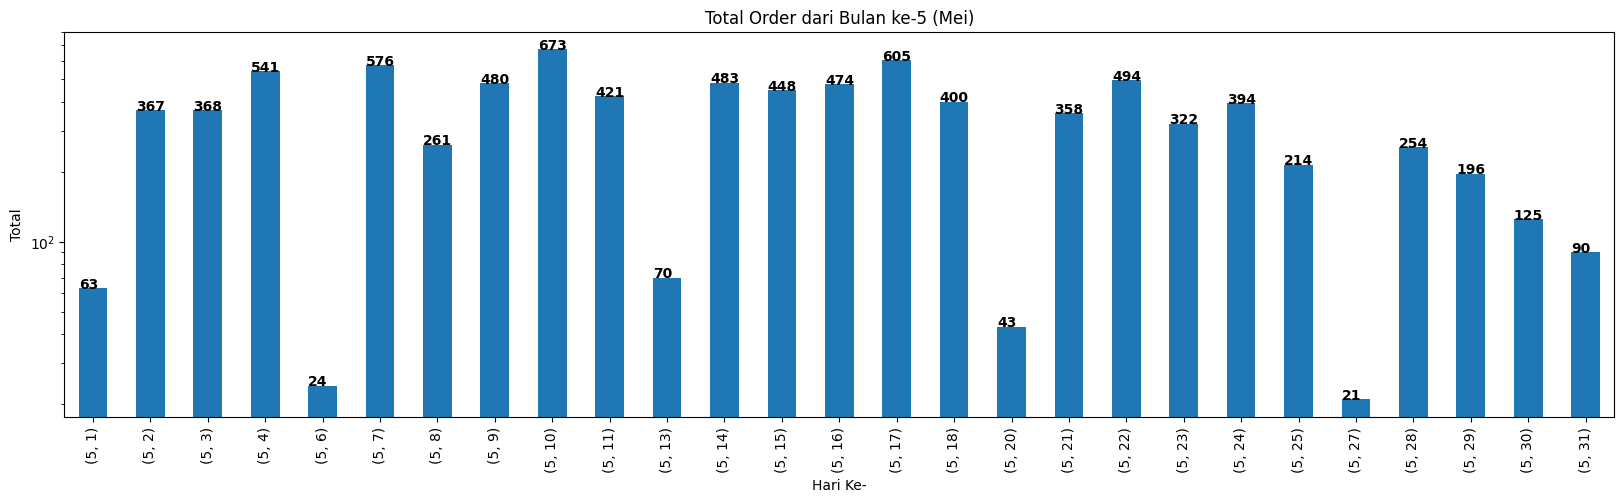

In [49]:
dt_day = day_total_orders.plot(
    kind='bar',
    title='Total Order dari Bulan ke-5 (Mei)',
    ylabel='Total',
    xlabel='Hari Ke-',
    figsize=(20, 5),
    logy=True
    )

for p in dt_day.patches:
    dt_day.annotate(str(p.get_height()), (p.get_x(), p.get_height()), weight='bold')

plt.show()

## Saving Data

In [50]:
# menghapus semua data duplikat

used_data = data.drop_duplicates(['product_id', 'shipping_limit_date'], keep='first')
used_data

,order_item_id,product_id,shipping_limit_date,price,freight_value,product,year,month,day
0,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19,58.90,13.29,cool_stuff,2017,9,19
1,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03,239.90,19.93,pet_shop,2017,5,3
2,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18,199.00,17.87,moveis_decoracao,2018,1,18
3,1,7634da152a4610f1595efa32f14722fc,2018-08-15,12.99,12.79,perfumaria,2018,8,15
4,1,ac6c3623068f30de03045865e4e10089,2017-02-13,199.90,18.14,ferramentas_jardim,2017,2,13
...,...,...,...,...,...,...,...,...,...
112645,1,4aa6014eceb682077f9dc4bffebc05b0,2018-05-02,299.99,43.41,utilidades_domesticas,2018,5,2
112646,1,32e07fd915822b0765e448c4dd74c828,2018-07-20,350.00,36.53,informatica_acessorios,2018,7,20
112647,1,72a30483855e2eafc67aee5dc2560482,2017-10-30,99.90,16.95,esporte_lazer,2017,10,30
112648,1,9c422a519119dcad7575db5af1ba540e,2017-08-21,55.99,8.72,informatica_acessorios,2017,8,21


In [51]:
used_data.shape

(92428, 9)

In [52]:
# ubah data menjadi Pickle dan Simpan

used_data = used_data.reset_index(drop=True)

In [53]:
used_data = used_data.drop(['product_id'], axis=1)
used_data.to_pickle('drive/My Drive/Data Science/Streamlit/used_data.pickle')

In [54]:
used_data

,order_item_id,shipping_limit_date,price,freight_value,product,year,month,day
0,1,2017-09-19,58.90,13.29,cool_stuff,2017,9,19
1,1,2017-05-03,239.90,19.93,pet_shop,2017,5,3
2,1,2018-01-18,199.00,17.87,moveis_decoracao,2018,1,18
3,1,2018-08-15,12.99,12.79,perfumaria,2018,8,15
4,1,2017-02-13,199.90,18.14,ferramentas_jardim,2017,2,13
...,...,...,...,...,...,...,...,...
92423,1,2018-05-02,299.99,43.41,utilidades_domesticas,2018,5,2
92424,1,2018-07-20,350.00,36.53,informatica_acessorios,2018,7,20
92425,1,2017-10-30,99.90,16.95,esporte_lazer,2017,10,30
92426,1,2017-08-21,55.99,8.72,informatica_acessorios,2017,8,21


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_item_id        112650 non-null  int64  
 1   product_id           112650 non-null  object 
 2   shipping_limit_date  112650 non-null  object 
 3   price                112650 non-null  float64
 4   freight_value        112650 non-null  float64
 5   product              112650 non-null  object 
 6   year                 112650 non-null  int64  
 7   month                112650 non-null  int64  
 8   day                  112650 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 7.7+ MB
